In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

# Lab 4 – Tables

## Data 6, Summer 2024

In this lab, we will be talking all about **tables**. We use tables to store all sorts of data form sports statistics to population information. If there's data you have ever been curious about, it is very likely that the internet has a table somewhere with that data!

Tables are integral to the foundation of Data Science, and in this lab we will go over how to **query** a table. **Querying** a table is basically asking information about the table. Some examples of common queries (in English, not code):

- How many data points are there?
- Which data points have a specific characteristic?
- What is the attribute of a specific data point?
- And many more!

There are so many ways we can use tables to get information we need, and there are several existing libraries in Python that we can use to do this! In this course, we will be using the `datascience` library, and if you take Data Science classes beyond this one, you'll likely learn many more.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 1: Basic Table Functions

### Loading a Table

Recall in Lab 2, we introduced the `Table.read_table` method, which takes a *file path* and constructs a `Table` with the information from that file. Let's see how this works using the file `"data/riverside.csv"`, which contains information about UC Riverside's admissions.

*Note*: If you want to check where the `riverside.csv` file is, you can look in your DataHub directory by clicking `File` > `Open...` in the top left.

In [2]:
ucr = Table.read_table("data/riverside.csv")
ucr.show(5)

Year,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,90
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Domestic Unknown,37
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,International,99


### Question 1.1 (Discussion)
What does each row in the dataset correspond to? In other words, what is the granularity of our data?

**SOLUTION:** Each row in the dataset corresponds to a specific status/level/gender/ethnicity stratification of students for each year.

---
### Excluding columns: `drop`

We now have information about UC Riverside Admissions in a `datascience` Table. It is common in data analysis for our tables to have columns that may not be relevant to what our exploration is focused on. Along with this, it is very common for our datasets to have many rows or columns with `NaN` values (`nan` stands for "Not A Number", and it is typically used to denote a missing value). One way of cleaning up our table to remove these unnecessary columns is to use the `drop` method!

**However**, it is not a good idea to blindly drop columns with several NaN values from a table. Think back to what you saw with the missing values in Lab 2. What information would have been lost if we just dropped all missing values?

Fortunately, our table below does not have any missing values! However, for the sake of demonstrating how to use this method, let's use the `drop` method to remove a column from our table, such as the `"New/Continuing Status"` column:

In [3]:
ucr_dropped = ucr.drop("New/Continuing Status")
ucr_dropped.show(5)

Year,Level,Original Entry Type,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Black/African American,90
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,Domestic Unknown,37
2022,Undergraduate,Undergraduate Frosh,Full-Time,Female,International,99


*Note:* We created a new table called `ucr_dropped` with the `New/Continuing Status` dropped. The original `ucr` table still has this column, and we'll continue using that original table in the following exercises!

### Question 1.2 (Multiple Choice)
If the `New/Continuing Status` column is dropped using the `drop` method, what would `ucr_dropped` look like? You can answer the question by assigning `q1_3` to `make_array(...)` where `...` is the choice of your answer (eg. `make_array(3)`).

1. It contains only rows with NaN values.
2. It contains only the columns before the `New/Continuing Status` column.
3. It contains all columns except the `New/Continuing Status` column.
4. It contains the same columns as the original table but all NaN values in the `New/Continuing Status` column are dropped.

In [4]:
q1_2 = make_array(3) # SOLUTION

In [5]:
assert isinstance(q1_2, np.ndarray)

In [6]:
# HIDDEN
assert q1_2 == make_array(3)

### Question 1.3
Each row in the dataset corresponds to a specific status/level/gender/ethnicity combination of students for each year. Let's take a look at how many rows we have overall. Assign the variable `ucr_rows` to the number of rows in `ucr`. 

You should not write an integer, but instead use one of the table attributes we have talked about so far to **calculate** the number of rows.

*Hint:* Stuck? Remember, you can reference all of the Table tools in `datascience` by looking at the Data 6 Python Reference sheet [here](http://data6.org/su23/reference). 

In [7]:
ucr_rows = ucr.num_rows # SOLUTION
ucr_rows

5021

In [8]:
assert isinstance(ucr_rows, int)

In [9]:
assert ucr_rows == 5021

---
### Querying the table: `column`

Let's try querying our new table using the `column` method to determine which values of race/ethnicity exist in the dataset. This information is contained within the `"IPEDS Race/Ethnicity"` column of the `ucr` table.

In [10]:
ethnicity_list = ucr.column("IPEDS Race/Ethnicity")
ethnicity_list

array(['Asian', 'Black/African American', 'Chicano/Latino', ...,
       'Domestic Unknown', 'International', 'White'],
      dtype='<U32')

One downside of doing it this way is that the list would be long and repetitive, since it will include the race/ethnicity for every row, resulting in repeated values. To work around this, we can use the `np.unique` method to tell us all the race/ethnicity values only once as they appear:

In [11]:
np.unique(ethnicity_list)

array(['American Indian/Alaskan Native', 'Asian', 'Black/African American',
       'Chicano/Latino', 'Domestic Unknown', 'International',
       'Native Hawaiian/Pacific Islander', 'Two or More Races', 'White'],
      dtype='<U32')

---
### Picking columns: `select`

What if we had several columns we weren't interested in, and only a few that we were? Instead of dropping several columns, we can use the `select` method to grab only the columns we want. 

### Question 1.4
For this example, we only want to keep the `"Year"`, `"Level"`, `"Full-Time Status"`, `"IPEDS Race/Ethnicity"`, and `"Fall Headcount"`  columns. Fill in the following code so that the `ucr` table has only the relevant columns.

In [12]:
ucr_selected = ucr.select('Year', 'Level', 'Full-Time Status', 'IPEDS Race/Ethnicity', 'Fall Headcount') # SOLUTION
ucr_selected

Year,Level,Full-Time Status,IPEDS Race/Ethnicity,Fall Headcount
2022,Undergraduate,Full-Time,Asian,1129
2022,Undergraduate,Full-Time,Black/African American,90
2022,Undergraduate,Full-Time,Chicano/Latino,1219
2022,Undergraduate,Full-Time,Domestic Unknown,37
2022,Undergraduate,Full-Time,International,99
2022,Undergraduate,Full-Time,Native Hawaiian/Pacific Islander,6
2022,Undergraduate,Full-Time,Two or More Races,128
2022,Undergraduate,Full-Time,White,221
2022,Undergraduate,Full-Time,Asian,1107
2022,Undergraduate,Full-Time,Black/African American,64


In [13]:
assert isinstance(ucr_selected, Table)

In [14]:
assert ucr_selected.num_columns == 5

In [15]:
# HIDDEN
assert all(ucr_selected) == all(ucr.select('Year', 'Level', 'Full-Time Status', 'IPEDS Race/Ethnicity', 'Fall Headcount'))

*Note:* As before, we created a new table for the sake of this example. We'll continue using the `ucr` table below!

### Question 1.5 (Multiple Choice)
What is the purpose of using the `select` method in this context? You can answer the question by assigning `q1_5` to `make_array(...)` where `...` is the choice of your answer (eg. `make_array(3)`).

1. To drop specific columns from the table selectively.
2. To filter rows based on a corresponding condition to keep relevant information.
3. To rearrange and rename columns in the table based on a criteria.
4. To choose specific columns to keep in the table and create a new table with only the selected columns.

In [16]:
q1_5 = make_array(4) # SOLUTION

In [17]:
assert isinstance(q1_5, np.ndarray)

In [18]:
# HIDDEN
assert q1_5 == make_array(4)

---
### Changing column labels: `relabeled`

We can rename column labels using the `relabeled` method. With this function, you are able to:
1. Relabel a *single column*
2. Relabel *several columns* at once

To change the names of multiple columns, we pass in an array of the old names and an array of the new names as the 2 inputs to `relabeled`.

*Note*: You may see another method called `relabel` in the `datascience` documentation. Please avoid using this, as it can change your data when you may not want to.

### Question 1.6
If we're accessing the `"IPEDS Race/Ethnicity"` column a lot, it could be cumbersome to type the long column name multiple times. Let's change the column label instead to `"Race/Ethnicity"`.

*Hint*: We've provided skeleton code for you to use.

In [19]:
# BEGIN SOLUTION NO PROMPT
ucr_relabeled = ucr.relabeled('IPEDS Race/Ethnicity', 'Race/Ethnicity')
# END SOLUTION
""" # BEGIN PROMPT
ucr_relabeled = ucr.relabeled(..., ...)
""" # END PROMPT
ucr_relabeled.show(5)

Year,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,90
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Domestic Unknown,37
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,International,99


In [20]:
assert isinstance(ucr_relabeled, Table)

In [21]:
assert "Race/Ethnicity" in ucr_relabeled.labels

In [22]:
assert "IPEDS Race/Ethnicity" not in ucr_relabeled.labels

In [23]:
# HIDDEN
assert all(ucr_relabeled) == all(ucr.relabeled('IPEDS Race/Ethnicity', 'Race/Ethnicity'))

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 2: More Table Functions

### Sorting a column: `sort`

We will now introduce a new table method: `sort`. The `sort` table method allows us to see a table's column values sorted by its values in either **decreasing** (`descending=True`) or **increasing** (`descending=False`) order.

Let's say we want to ask the question: among all years, which fall headcount was the highest? Let's use the `sort` method to find out:

In [24]:
ucr_relabeled.sort("Fall Headcount", descending=True)

Year,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2019,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,3432
2018,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,3240
2017,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,3191
2020,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,3093
2021,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,3052
2022,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,2970
2014,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,2609
2016,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,2572
2015,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,2569
2013,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,2503


Using the same method but changing the `descending` parameter to `True`, we can also discover the lowest headcounts:

In [25]:
ucr_relabeled.sort("Fall Headcount", descending=False)

Year,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,New,Part_Time,Female,Two or More Races,1
2022,Undergraduate,Undergraduate Other,Continuing,Full-Time,Female,Asian,1
2022,Undergraduate,Undergraduate Other,Continuing,Full-Time,Female,Two or More Races,1
2022,Undergraduate,Undergraduate Other,Continuing,Full-Time,Female,White,1
2022,Undergraduate,Undergraduate Other,Continuing,Part_Time,Male,Chicano/Latino,1
2022,Undergraduate,Undergraduate Other,Continuing,Part_Time,Male,International,1
2022,Undergraduate,Undergraduate Other,Continuing,Part_Time,Male,Two or More Races,1
2022,Undergraduate,Undergraduate Other,Continuing,Part_Time,Male,White,1
2022,Undergraduate,Undergraduate Transfer,New,Full-Time,Male,American Indian/Alaskan Native,1
2022,Undergraduate,Undergraduate Transfer,New,Part_Time,Female,Black/African American,1


### Question 2.1
Let's say we wanted to sort the table so that we see the most recent years in the dataset first. Fill in the following code using the `sort` method to accomplish this.

*Note:* Be sure to use the `ucr_relabeled` table for this question!

In [26]:
ucr_sorted_year = ucr_relabeled.sort("Year", descending=True) # SOLUTION
ucr_sorted_year.show(5)

Year,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,90
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Domestic Unknown,37
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,International,99


In [27]:
assert isinstance(ucr_sorted_year, Table)

In [28]:
assert ucr_sorted_year.take(0).column('Year')[0] == 2022

In [29]:
assert ucr_sorted_year.take(1).column('Fall Headcount')[0] == 90

In [30]:
# HIDDEN
assert all(ucr_sorted_year) == all(ucr_relabeled.sort("Year", descending=True))

---
### Row selection: `where` and the `are` Predicates

The last table method we will talk about is the `where` method. The `where` method keeps all rows that satisfiy a particular boolean condition. It takes in a column label and an `are` statement, which can be crafted using the `are` library. These are the most important `are` library methods, but there are many more if you would like to investigate: [explore the 'are' library here.](https://data6.org/su23/reference/#tablewhere-predicates)

| Method | Input Type | Method Description |
| --- | --- | --- |
| `are.equal_to(n)` | number | Is the value from the column equal to `n`? |
| `are.above(n)` | number | Is the value from the column above `n`? |
| `are.above_or_equal_to(n)` | number | Is the value from the column above or equal to `n`? |
| `are.below(n)` | number | Is the value from the column below `n`? |
| `are.below_or_equal_to(n)` | number | Is the value from the column below or equal `n`? |
| `are.containing(s)` | string | Is `s` contained in the string value from the given column? |
| `are.containined_in(s)` | string | Is the string value from the given column contained in `s`? |

Adding a `not_` in front of all of these methods makes each method do the opposite of what it does (ex: `are.not_equal_to(n)`).

*Note*: As we've seen in lecture, we can achieve an **exact match** by not explicitly using an `are` predicate. That is, `where("col", are.equal_to("something")` is identical to `where("col", "something")`; the latter is shorthand for the former.

For example, if we only wanted to see the rows in which the `"Fall Headcount"` was above 500, we could use the `where()` method combined with an `are` method:

In [31]:
ucr_relabeled.where("Fall Headcount", are.above(500))

Year,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Male,Asian,1107
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Male,Chicano/Latino,773
2022,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Asian,2365
2022,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,Chicano/Latino,2970
2022,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Female,White,545
2022,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Male,Asian,2466
2022,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Male,Chicano/Latino,1803
2022,Undergraduate,Undergraduate Frosh,Continuing,Full-Time,Male,White,601


Alternatively, if we wanted to see the rows of only undergrads, we could use the shorthand above by omitting the `are` predicate completely:

In [32]:
ucr_relabeled.where("Level", "Undergraduate")

Year,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,90
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Domestic Unknown,37
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,International,99
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Native Hawaiian/Pacific Islander,6
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Two or More Races,128
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,White,221
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Male,Asian,1107
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Male,Black/African American,64


When we omit the `are` predicate, the function is just using `are.equal_to` behind the scenes as the default option!

### Question 2.2
Suppose we only wanted to take a look at female-identifying individuals in the dataset. Use the shorthand in the example above with the `where` method to keep only these individuals.

In [33]:
ucr_f = ucr_relabeled.where("Gender", "Female") # SOLUTION
ucr_f.show(5)

Year,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,Race/Ethnicity,Fall Headcount
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,1129
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,90
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,1219
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Domestic Unknown,37
2022,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,International,99


In [34]:
assert isinstance(ucr_f, Table)

In [35]:
assert ucr_f.num_rows == 2516

In [36]:
assert all(ucr_f.column('Gender') == 'Female')

Let's dig a little deeper into what the `"Gender"` column looks like. Utilizing the `np.unique` method that we used in the first section above, we can find the distinct values in the `"Gender"` column, to see which values are used to represent gender in this dataset.

In [37]:
# Just run this cell
np.unique(ucr.column("Gender"))

array(['Female', 'Male'],
      dtype='<U6')

As we can see above, the only two options for representing gender in this dataset are "Female" and "Male". It can often be hard to determine how to represent complex pieces of information (especially when this information is about individual people) as categorized versions in data.

### Question 2.3 (Discussion)
Because this categorization of gender may not be the best way to represent this information, what do you think some potential issues with looking only at the female-identifying individuals from our data are? Additionally, what are the implications and potential sources of harm when we have to categorize information like this?

**SOLUTION:** Female category may not accurately capture all female-identifying students, or it may include individuals who are non-binary or would otherwise pick 'Other' as their gender selection, but were only given two options. People get left out when we have to binarize qualitative information about someone that may be more complex, like gender identity.

When working with data, it is always important to consider not only **the impacts that the representation of the data can have in the real world**, but also **the effects that the conclusions from your data analysis and visualizations can have!** Let's explore this a bit more next.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 3: Data Context Exploration

### A Further Look Into the `Gender` Column

Let's continue with a bit more analysis on the `"Gender"` column. The [source of this data](https://ir.ucr.edu/stats/enrollment/demographic) from UC Riverside also included a second dataset that displays the same admissions data, broken down by college. We'll load that dataset into a Table object below.

In [38]:
ucr_college = Table.read_table("data/riverside_by_college.csv")
ucr_college.show(5)

Year,College,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,81
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,5
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,78
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,International,10
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Two or More Races,7


As we can see from the `"Year"` column, this dataset also contains more updated information, including data up until 2023. Let's take a look at the way the data is represented in the `"Gender"` column for this dataset:

In [39]:
np.unique(ucr_college.column("Gender"))

array(['Female', 'Male', 'Nonbinary', 'Unknown'],
      dtype='<U9')

It looks like this dataset contains the additional values of `"Nonbinary"` and `"Unknown"` for `"Gender"`. The website that provides this data also provides some context on how the data was collected at the bottom of the page:

> "Gender identity has been collected on the UC admission application only since 2016. Therefore, there is no earlier data available in the nonbinary category."

Something to note is that these datasets are supposed to represent the same information. However, because UCR utilized two methods of representing the `"Gender"` column, it may not be completely appropriate to compare the raw numbers of the values alone -- some of the individuals who are in the `"Nonbinary"` or `"Unknown"` category in this dataset were likely placed into the `"Female"` or `"Male"` categories in the other dataset. Therefore, the numbers could be a bit skewed, and it may be beneficial to compare by proportions as an additional step. Doing this type of **extra basic background research on the source of our data can be incredibly helpful in our understanding of our data!**

---
### Exploration of Aggregation by College

We can also use the information at the bottom of the page of the data source to find some information about how STEM majors are classified:

> "STEM Majors include those in the Bourns College of Engineering (BCOE) and the College of Natural and Agricultural Sciences (CNAS)."

Using this information, we can use the `where` method to create two different tables: one for STEM majors, and one for non-STEM majors.

In [40]:
np.unique(ucr_college.column("College"))

array(['Bourns College of Engineering',
       'College of Humanities, Arts, and Social Sciences',
       'College of Natural and Agricultural Sciences',
       'Graduate School of Education', 'School of Business',
       'School of Medicine', 'School of Public Policy'],
      dtype='<U48')

In [41]:
ucr_s = ucr_college.where("College", are.contained_in(["Bourns College of Engineering", "College of Natural and Agricultural Sciences"]))
ucr_s.show(3)

Year,College,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,81
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,5
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,78


In [42]:
ucr_ns = ucr_college.where("College", are.contained_in(["College of Humanities, Arts, and Social Sciences", "Graduate School of Education", "School of Business", "School of Medicine", "School of Public Policy"]))
ucr_ns.show(3)

Year,College,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2023,"College of Humanities, Arts, and Social Sciences",Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,486
2023,"College of Humanities, Arts, and Social Sciences",Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,72
2023,"College of Humanities, Arts, and Social Sciences",Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,867


Now, if we wanted to do a rough tabular comparison of the STEM vs. non-STEM majors, we can group by `"Gender"` and compare the numbers.

For now, don't worry too much about understanding the syntax for the group method: we'll cover it in the next lab! The code in the two cells below simply aggregates the data by calculating the sums of the `"Fall Headcount"` column for each gender category.

In [43]:
ucr_s_grouped = ucr_s.group("Gender", np.sum).select(["Gender", "Fall Headcount sum"]).sort("Fall Headcount sum", descending=True)
ucr_s_grouped 

Gender,Fall Headcount sum
Male,132516
Female,96494
Unknown,1063
Nonbinary,428


In [44]:
ucr_ns_grouped = ucr_ns.group("Gender", np.sum).select(["Gender", "Fall Headcount sum"]).sort("Fall Headcount sum", descending=True)
ucr_ns_grouped 

Gender,Fall Headcount sum
Female,195432
Male,136041
Unknown,1499
Nonbinary,1166


From the above two tables, we can see an interesting discrepancy that we see quite often with this type of data: there are more male-identifying individuals represented by the STEM majors, and more female-identifying individuals repesented by the non-STEM majors. Thanks to the other two representations of `"Unknown"` and `"Nonbinary"` though, we can also see that there are more of these individuals in the non-STEM majors table as well.

Using what we learned in Lab 3, we can also visualize the data below to be able to see the trends and proportions of the data more clearly:

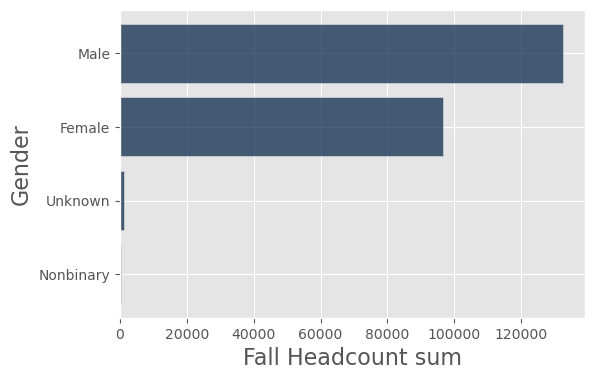

In [45]:
ucr_s_grouped.barh("Gender", "Fall Headcount sum")

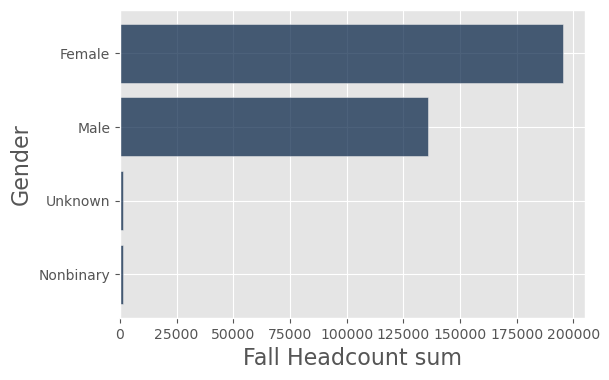

In [46]:
ucr_ns_grouped.barh("Gender", "Fall Headcount sum")

Going back to an idea we posed when starting to look into the `"Gender"` column: while this type of exploration is very important and can also be informative, **it is also important to remember that it is not always enough to simply look at a trend like this and state it.** Ultimately, it is typically very **hard to encode data about humans into numbers and categories, because in doing so, we lose information and context about the individual we are looking at.** In your analysis in the future, try to strike a balance of looking at interesting trends in the data and considering the original context of the data you're working with.

**Finally, for reference, here is the link to the Data 6 Python Reference (our Python cheat-sheet) so you can review some of the methods we've used for tables in this lab!**

[Python Reference](http://data6.org/su23/reference)

---
## Done! 😇

That's it! There's nowhere for you to submit this, as labs are not assignments. However, please ask any questions you have with this notebook in lab or on Ed.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()